# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 


In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000], y[36000]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

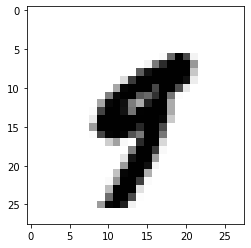

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X[36000].reshape(28, 28), cmap = plt.cm.binary, interpolation = 'nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_train_new = (y_train == '5')
y_test_new = (y_test == '5')

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train, y_train_new)
X_test_std = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500)
model.fit(X_train_std, y_train_new)

LogisticRegression(max_iter=500)

### Does the classifier predict correctly the 36000th digit we picked before?

In [11]:
model.predict(X[[36000]])

array([False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [13]:
never_5_clf.fit(X_test_std, y_test_new)
never_5_clf.predict(X_test_std)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [14]:
model.predict(X_test_std)

array([False, False, False, ..., False,  True, False])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [15]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
confusion_matrix(never_5_clf.predict(X_test), model.predict(X_test))

array([[9329,  671],
       [   0,    0]], dtype=int64)

In [16]:
confusion_matrix(y_test_new, model.predict(X_test_std))

array([[9027,   81],
       [ 148,  744]], dtype=int64)

In [17]:
confusion_matrix(y_test_new,never_5_clf.predict(X_test_std))

array([[9108,    0],
       [ 892,    0]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test_new, model.predict(X_test_std)))
print(recall_score(y_test_new, model.predict(X_test_std)))
print(f1_score(y_test_new, model.predict(X_test_std)))
print('--------------------------------------------------------------------')
print(precision_score(y_test_new, never_5_clf.predict(X_test_std)))
print(recall_score(y_test_new, never_5_clf.predict(X_test_std)))
print(f1_score(y_test_new, never_5_clf.predict(X_test_std)))

0.9018181818181819
0.8340807174887892
0.8666278392545136
--------------------------------------------------------------------
0.0
0.0
0.0


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [19]:
'''
The logistic regression has a better score because it is not a dumb classifier. It has a good precision to predict correct values and a good recall to capture data.
'''

'\nThe logistic regression has a better score because it is not a dumb classifier. It has a good precision to predict correct values and a good recall to capture data.\n'

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

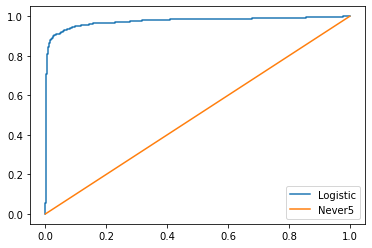

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_new, model.predict_proba(X_test_std)[:, 1], )
fpr_never5, tpr_never5, thresholds_never5 = roc_curve(y_test_new, never_5_clf.predict(X_test_std))
plt.plot(fpr, tpr, label='Logistic')
plt.plot(fpr_never5, tpr_never5, label='Never5')
plt.legend()

### Now find the roc_auc_score for each. 

In [21]:
print(roc_auc_score(y_test_new, model.predict(X_test_std)))
print(roc_auc_score(y_test_new, model.predict_proba(X_test_std)[:,1]))

0.9125937184281891
0.974578722494983


### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


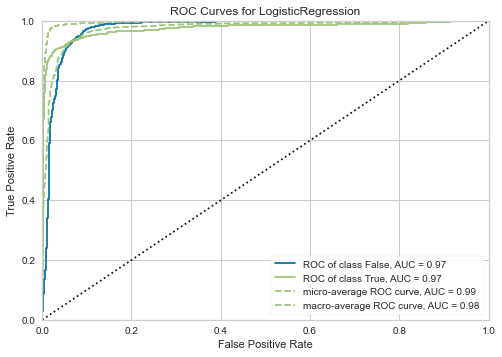

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [22]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC
model = LogisticRegression()
visualizer = ROCAUC(model)
visualizer.fit(X_train_std, y_train_new)        
visualizer.score(X_test_std, y_test_new)        
visualizer.show() 

### What does this metric tell you? Which classifier works better with this metric in mind?

In [23]:
'''
Better the algorithm's ability to distinguish between the two classes. 
'''

"\nBetter the algorithm's ability to distinguish between the two classes. \n"